### IMPORT MODULES

In [59]:
import numpy as np
import pandas as pd
import math
import sys, os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sys.path.append(os.path.abspath(os.path.join('../scripts/')))
from clean_dataframe import CleanTelco
from plot_dataframe import PlotDataFrame

In [6]:
#Initialize Plot helper
my_plt = PlotDataFrame()
#Load data
df_telco_clean = pd.read_csv("../data/cleaned_telco_data.csv")
df_telco_clean

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,0,-9223372036854775808,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1,-9223372036854775808,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,208201909211140,33681854413,35794009006359,L77566A,...,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,2,-9223372036854775808,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,208200314458056,33760627129,35281510359387,D42335A,...,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3,-9223372036854775808,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,208201402342131,33750343200,35356610164913,T21824A,...,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,4,-9223372036854775808,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,208201401415120,33699795932,35407009745539,D88865A,...,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146882,149991,7349883264234529792,2019-04-29 07:28:00,794.0,2019-04-30 00:36:00,523.0,208201716588303,33762146363,35860607430880,D10033B,...,57231077.0,295424923.0,915749.0,12036660.0,1730617.0,17269104.0,38337514.0,268231454.0,263493166.0,352656000.0
146883,149992,-9223372036854775808,2019-04-29 07:28:00,114.0,2019-04-30 07:04:00,724.0,208201402149148,33761274518,35327007109396,D78058B,...,45923464.0,70341448.0,1752716.0,7283344.0,954877.0,36814543.0,13742615.0,43581298.0,820617848.0,116264912.0
146884,149993,-9223372036854775808,2019-04-29 07:28:00,79.0,2019-04-30 18:22:00,512.0,208201402072093,33626114091,35735309473406,D73542B,...,43629118.0,623318363.0,2307959.0,12459876.0,2555578.0,26306531.0,40974659.0,571286842.0,179348636.0,666947481.0
146885,149994,-9223372036854775808,2019-04-29 07:28:00,83.0,2019-04-30 15:01:00,268.0,208200313074099,33645655643,35155409288696,T88383B,...,59377936.0,862796008.0,892867.0,8922614.0,1565542.0,42219856.0,28354119.0,825524976.0,792559807.0,922173944.0


### Univariant Analysis

#### Dur (ms)

In [7]:
df_telco_clean[['Dur (ms)']].describe()

,Dur (ms)
count,1.468870e+05
mean,1.001894e+08
std,5.898822e+07
min,7.142988e+06
25%,5.852686e+07
50%,8.639999e+07
75%,1.331594e+08
max,2.451082e+08


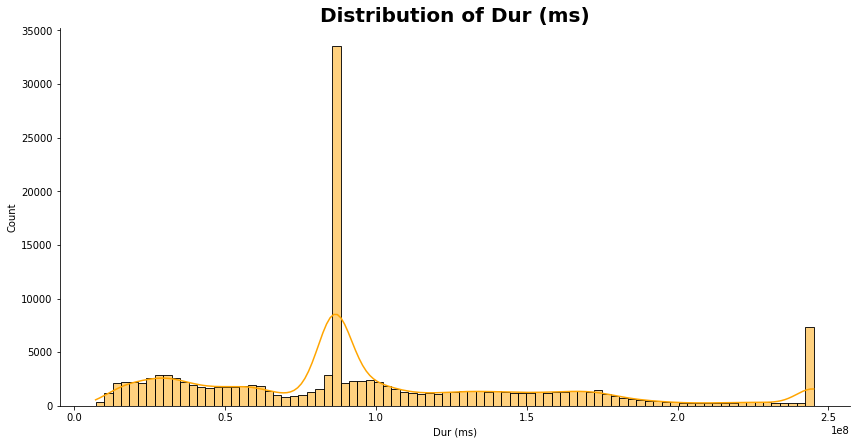

In [8]:
my_plt.hist(df_telco_clean, 'Dur (ms)', 'orange')

#### Youtube Data Volume

In [9]:
df_telco_clean[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,1.468870e+05
mean,2.264198e+07
std,9.244659e+06
min,1.296550e+05
25%,1.599692e+07
50%,2.266341e+07
75%,2.929351e+07
max,4.519008e+07


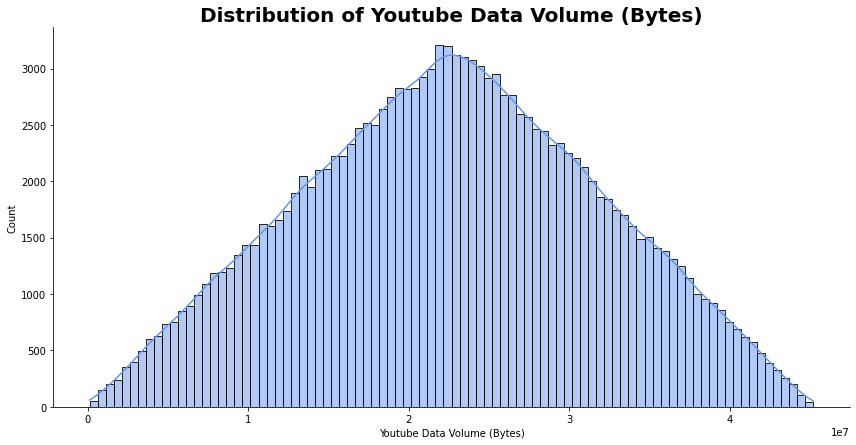

In [10]:
my_plt.hist(df_telco_clean, 'Youtube Data Volume (Bytes)')

#### Netflix Data Volume

In [11]:
df_telco_clean[['Netflix Data Volume (Bytes)']].describe()


,Netflix Data Volume (Bytes)
count,1.468870e+05
mean,2.262923e+07
std,9.259113e+06
min,9.843200e+04
25%,1.598200e+07
50%,2.263459e+07
75%,2.928806e+07
max,4.519815e+07


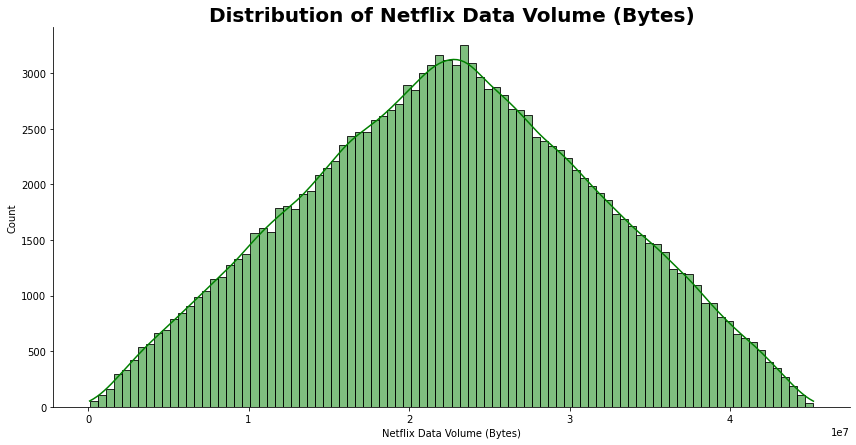

In [12]:
my_plt.hist(df_telco_clean, 'Netflix Data Volume (Bytes)', 'green')


#### Gaming Data Volume

In [13]:
df_telco_clean[['Gaming Data Volume (Bytes)']].describe()

,Gaming Data Volume (Bytes)
count,1.468870e+05
mean,4.303526e+08
std,2.440925e+08
min,3.063580e+05
25%,2.186904e+08
50%,4.316603e+08
75%,6.415752e+08
max,8.592028e+08


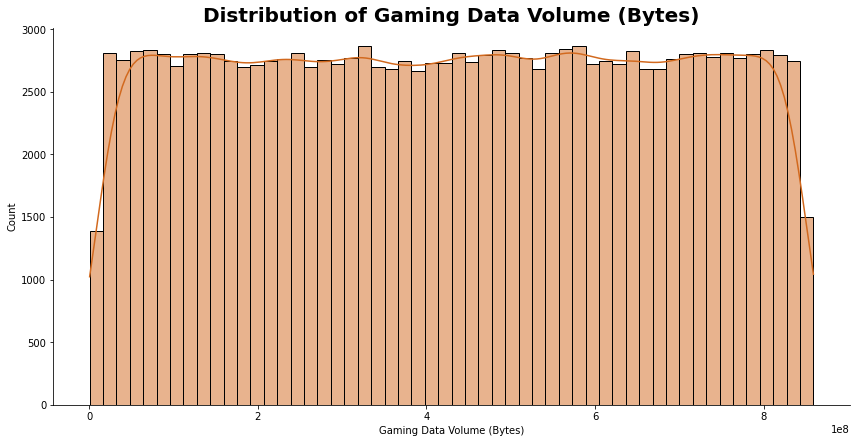

In [14]:
my_plt.hist(df_telco_clean, 'Gaming Data Volume (Bytes)', 'chocolate')

#### Email Data Volume

In [15]:
df_telco_clean[['Email Data Volume (Bytes)']].describe()

,Email Data Volume (Bytes)
count,1.468870e+05
mean,2.259087e+06
std,1.071133e+06
min,8.359000e+03
25%,1.359012e+06
50%,2.263890e+06
75%,3.159616e+06
max,4.518036e+06


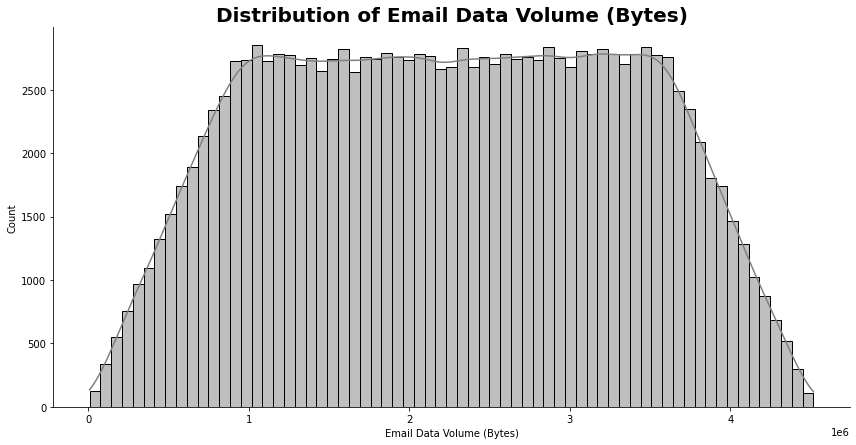

In [16]:
my_plt.hist(df_telco_clean, 'Email Data Volume (Bytes)', 'grey')


#### Google Data Volume

In [17]:
df_telco_clean[['Google Data Volume (Bytes)']].describe()


,Google Data Volume (Bytes)
count,1.468870e+05
mean,7.807976e+06
std,3.517132e+06
min,4.033000e+04
25%,4.943585e+06
50%,7.815531e+06
75%,1.068314e+07
max,1.552878e+07


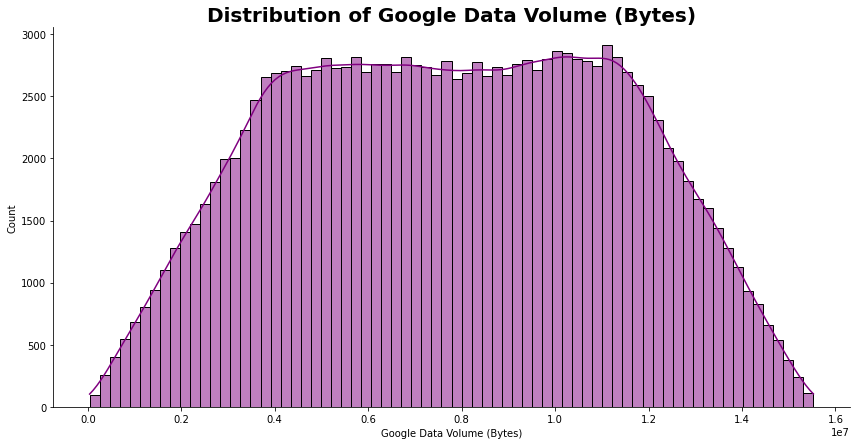

In [18]:
my_plt.hist(df_telco_clean, 'Google Data Volume (Bytes)', 'purple')


#### Social Media Data Volume

In [19]:
df_telco_clean[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,1.468870e+05
mean,1.827736e+06
std,1.035571e+06
min,1.563000e+03
25%,9.313390e+05
50%,1.825390e+06
75%,2.727156e+06
max,3.650861e+06


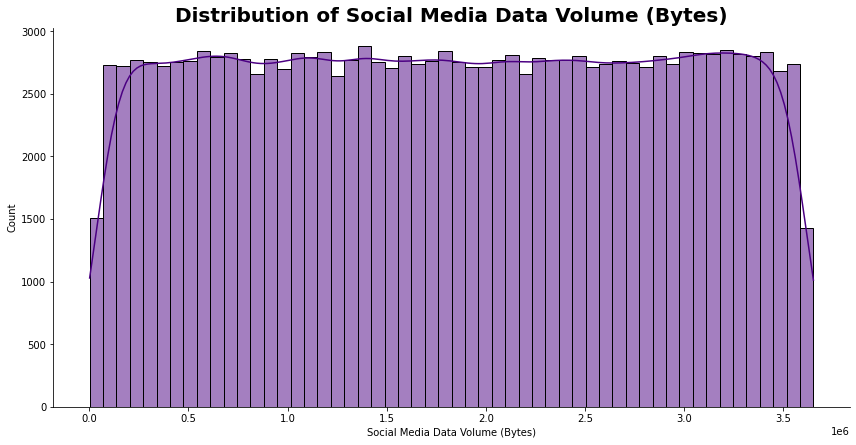

In [20]:
my_plt.hist(df_telco_clean, 'Social Media Data Volume (Bytes)', 'indigo')

#### Other Data Volume

In [21]:
df_telco_clean[['Other Data Volume (Bytes)']].describe()


,Other Data Volume (Bytes)
count,1.468870e+05
mean,4.292669e+08
std,2.432060e+08
min,1.490450e+05
25%,2.184772e+08
50%,4.297978e+08
75%,6.396625e+08
max,8.595209e+08


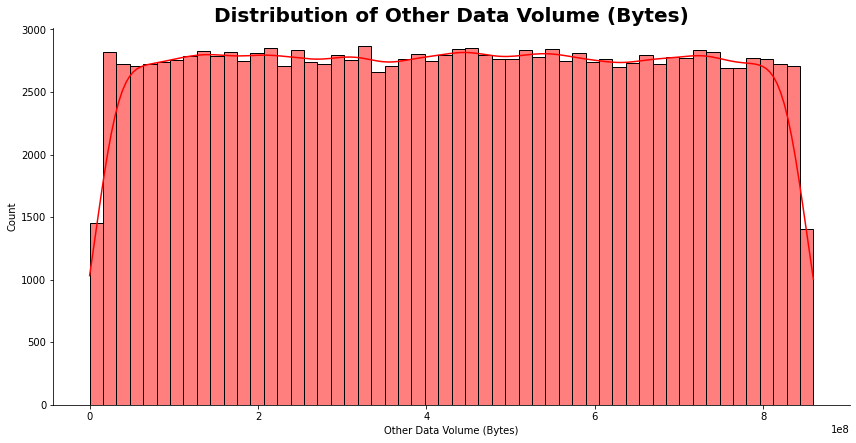

In [22]:
my_plt.hist(df_telco_clean, 'Other Data Volume (Bytes)', 'red')


#### Total Volume

In [23]:
df_telco_clean[['Total Data Volume (Bytes)']].describe()

,Total Data Volume (Bytes)
count,1.468870e+05
mean,4.957815e+08
std,2.444434e+08
min,2.895611e+07
25%,2.844777e+08
50%,4.969362e+08
75%,7.066379e+08
max,9.536316e+08


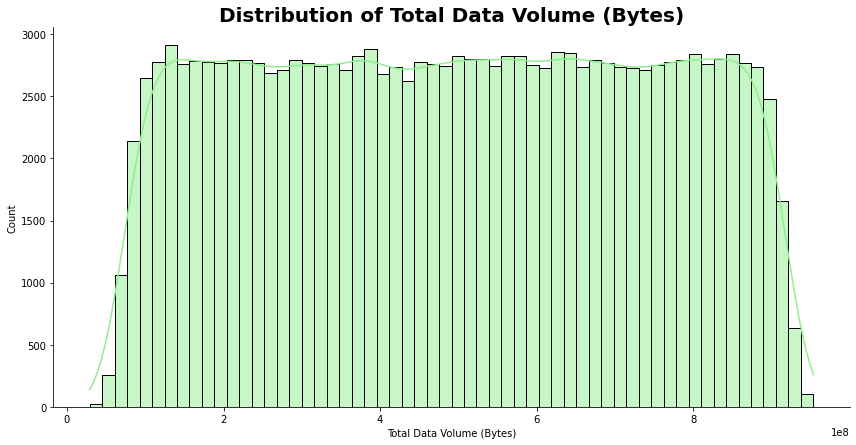

In [24]:
my_plt.hist(df_telco_clean, 'Total Data Volume (Bytes)', 'lightgreen')


### Bivariate Analysis

#### Youtube Data Volume Vs Total Data Volume

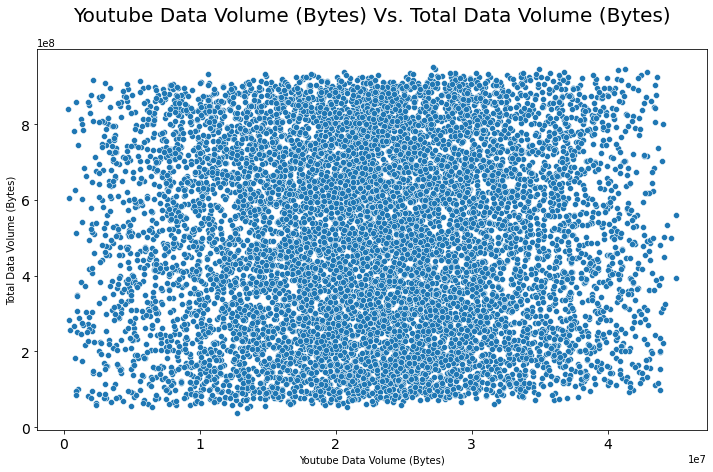

In [25]:
my_plt.scatter(df_telco_clean.sample(10000), 'Youtube Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Netflix Data Volume Vs Total Data Volume 

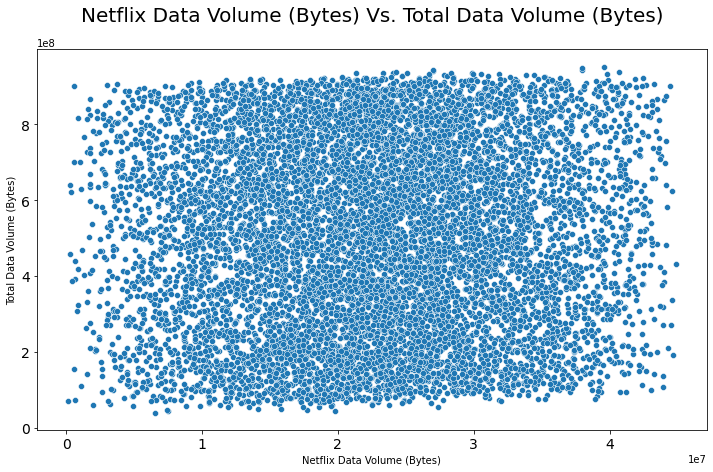

In [26]:
my_plt.scatter(df_telco_clean.sample(10000), 'Netflix Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Gaming Data Volume Vs Total Data Volume

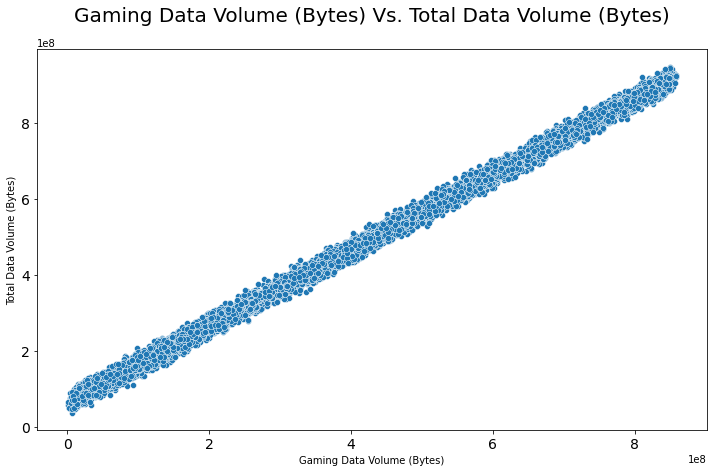

In [27]:
my_plt.scatter(df_telco_clean.sample(10000), 'Gaming Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Email Data Volume Vs Total Data Volume

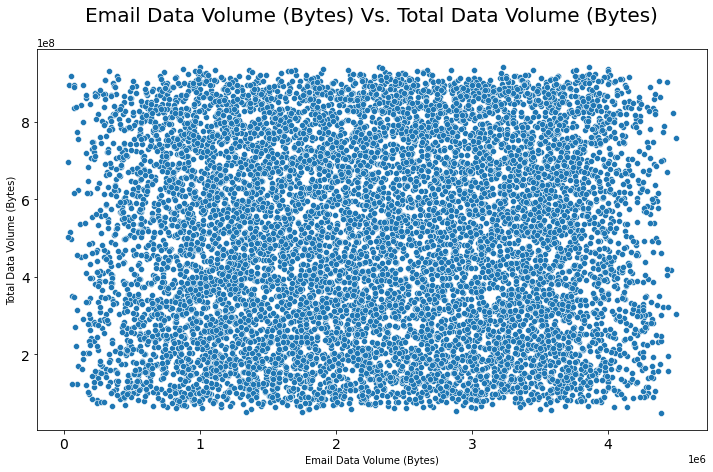

In [28]:
my_plt.scatter(df_telco_clean.sample(10000), 'Email Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Google Data Volume Vs Total Data Volume 

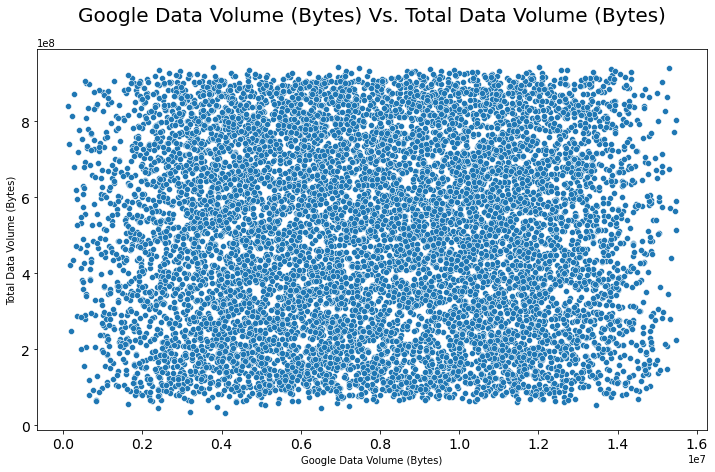

In [29]:
my_plt.scatter(df_telco_clean.sample(10000), 'Google Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Social Media Data Volume Vs Total Data Volume 

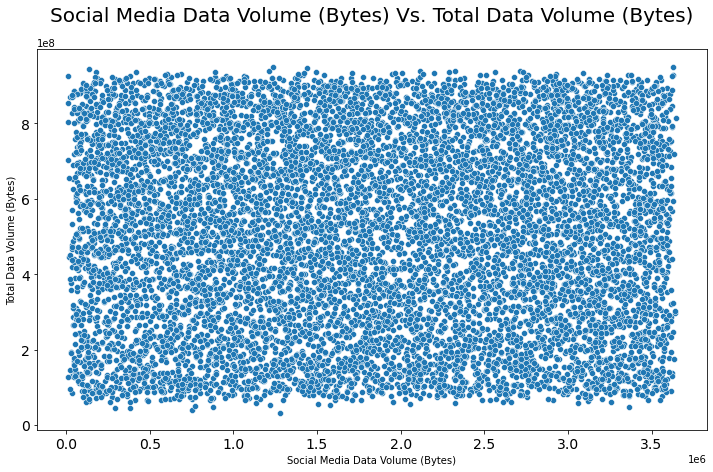

In [30]:
my_plt.scatter(df_telco_clean.sample(10000), 'Social Media Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Other Data Volume Vs Total Data Volume 

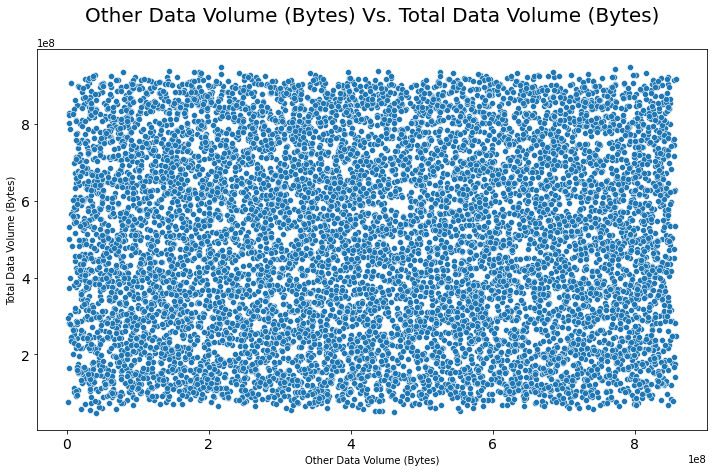

In [31]:
my_plt.scatter(df_telco_clean.sample(10000), 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)')


### Correlation Analysis

In [32]:
df_corr = df_telco_clean[[
    'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)',
    'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)',
    'Other Data Volume (Bytes)']
].corr()
df_corr

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Social Media Data Volume (Bytes),1.000000,-0.001933,0.004208,0.000570,0.001354,0.001894,0.005561
Google Data Volume (Bytes),-0.001933,1.000000,-0.000036,0.002172,-0.002018,-0.000800,-0.001268
Email Data Volume (Bytes),0.004208,-0.000036,1.000000,-0.003430,0.001518,0.000071,-0.000801
Youtube Data Volume (Bytes),0.000570,0.002172,-0.003430,1.000000,0.003604,-0.003674,0.003250
Netflix Data Volume (Bytes),0.001354,-0.002018,0.001518,0.003604,1.000000,-0.003546,-0.007924
Gaming Data Volume (Bytes),0.001894,-0.000800,0.000071,-0.003674,-0.003546,1.000000,-0.002814
Other Data Volume (Bytes),0.005561,-0.001268,-0.000801,0.003250,-0.007924,-0.002814,1.000000


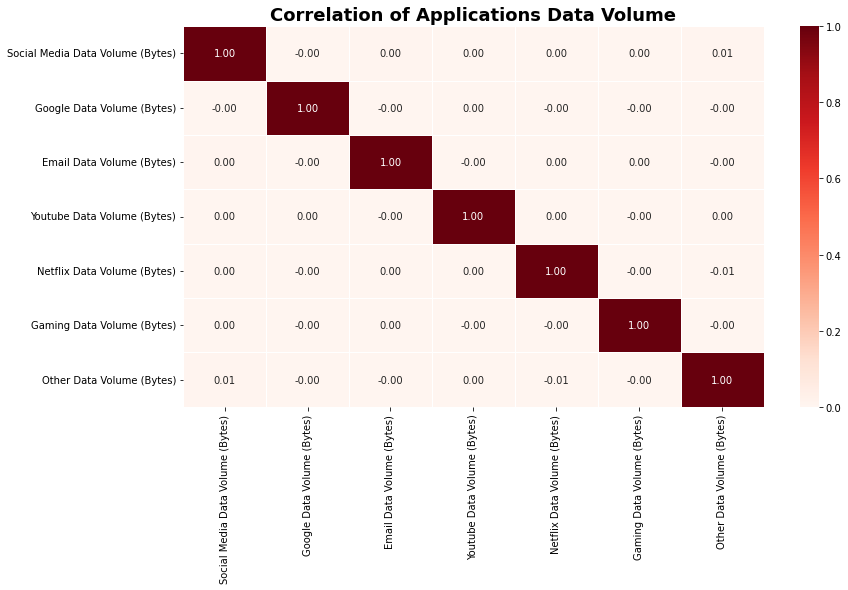

In [33]:
my_plt.heatmap(df_corr, "Correlation of Applications Data Volume")
#We can conclude that no correlation exist among the data usage applications

#### Handset Analysis

In [34]:
df_telco_clean['Handset Type'].value_counts().head(10)
#Top 10 Handset types

Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
unknown                          8820
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5150
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Name: Handset Type, dtype: int64

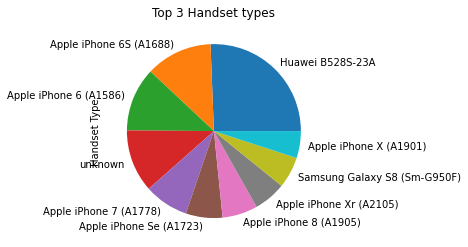

In [35]:
df_telco_clean['Handset Type'].value_counts().head(10).plot(kind='pie',  title="Top 3 Handset types");
#Top 3 Handset types

#### Handset Manufacturers

In [36]:
df_top_3_manf = df_telco_clean[['Handset Manufacturer']].value_counts().head(3)
df_top_3_manf

Handset Manufacturer
Apple                   59069
Samsung                 39902
Huawei                  33754
dtype: int64

<AxesSubplot:title={'center':'Top Handset Manufacturer'}, ylabel='None'>

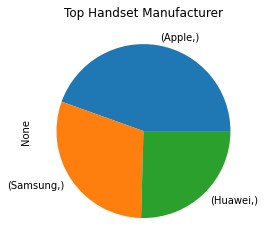

In [37]:
 df_telco_clean[['Handset Manufacturer']].value_counts().head(3).plot(kind='pie', title="Top Handset Manufacturer")

#### Top 5 Handsets of the top 3 Handset Manufacturers

In [38]:
df_top_3_manf = df_telco_clean['Handset Manufacturer'].value_counts().head(3)
df_top_3_manf

Apple      59069
Samsung    39902
Huawei     33754
Name: Handset Manufacturer, dtype: int64

In [39]:
#Top 5 handsets per top 3 handset manufacturer
df_top_3_manf = df_telco_clean[df_telco_clean["Handset Manufacturer"].isin(df_top_3_manf.index.tolist())]
top_handsets = df_top_3_manf['Handset Type'].groupby(df_telco_clean['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))
top_handsets

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9369
                      Apple iPhone 6 (A1586)             8967
                      Apple iPhone 7 (A1778)             6240
                      Apple iPhone Se (A1723)            5150
                      Apple iPhone 8 (A1905)             4961
Huawei                Huawei B528S-23A                  19373
                      Huawei E5180                       2062
                      Huawei P20 Lite Huawei Nova 3E     2000
                      Huawei P20                         1471
                      Huawei Y6 2018                      984
Samsung               Samsung Galaxy S8 (Sm-G950F)       4404
                      Samsung Galaxy A5 Sm-A520F         3673
                      Samsung Galaxy J5 (Sm-J530)        3664
                      Samsung Galaxy J3 (Sm-J330)        3431
                      Samsung Galaxy S7 (Sm-G930X)       3106
Name: Handset Typ

#### Number of xDR sessions of per user

In [40]:
number_of_xdr = df_telco_clean.groupby('MSISDN/Number')['MSISDN/Number'].agg('count').reset_index(name='Bearer Id').sort_values(by='Bearer Id',
        ascending=False)

number_of_xdr.rename(columns={number_of_xdr.columns[1]: 'number of xDR sessions'}, inplace=True)
number_of_xdr

,MSISDN/Number,number of xDR sessions
13379,33626320676,18
13035,33625779332,17
6353,33614892860,17
36666,33659725664,16
75561,33675877202,15
...,...,...
40613,33660669493,1
40612,33660669025,1
40610,33660668320,1
40609,33660668134,1


#### Average session duration per user

In [41]:
session_duration_per_user = df_telco_clean.groupby('MSISDN/Number').agg({'Dur (ms)': 'mean'})
session_duration_per_user.rename(
        columns={'Dur (ms)': 'Average session duration (ms)'}, inplace=True)
session_duration_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)

,Average session duration (ms)
MSISDN/Number,
337000037000919,245108160.5
33762185850,245108160.5
33762190964,245108160.5
33667099979,245108160.5
33762199147,245108160.5
33667078134,245108160.5
33667077911,245108160.5
33762213743,245108160.5
33646337581,245108160.5


#### Total Data Volume Analysis

In [49]:
df_telco_clean['Total UL (Bytes)'] = df_telco_clean['Total UL (Bytes)'].astype("int64")
df_telco_clean['Total DL (Bytes)'] = df_telco_clean['Total DL (Bytes)'].astype("int64")
df_telco_clean['Total Data Volume (Bytes)'] = df_telco_clean['Total Data Volume (Bytes)'].astype("int64")
total_data = df_telco_clean.groupby('MSISDN/Number')[[ 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_data.nlargest(105716, 'Total Data Volume (Bytes)')

,Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,
33614892860,689483001,8156743493,8846226494
33760536639,703478581,7811295382,8514773963
33625779332,729577380,7770043342,8499620722
33626320676,669650721,7301516540,7971167261
33675877202,581568792,7309541816,7891110608
...,...,...,...
33675475328,23503704,14518653,38022357
33782507973,26623910,11305331,37929241
33666684512,24544016,9455608,33999624


#### Total data volumne of each application per user

In [43]:
apps_total = df_telco_clean.groupby('MSISDN/Number')[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)']].sum()
apps_total.nlargest(10, 'Total Data Volume (Bytes)')

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,,,,,,
33614892860,28294544.0,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09,8846226494
33760536639,39783189.0,123223099.0,33693767.0,396289198.0,334643269.0,7.461045e+09,4.716134e+09,8514773963
33625779332,27135500.0,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09,8499620722
33626320676,43374779.0,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09,7971167261
33675877202,19222921.0,109860502.0,31514421.0,317410572.0,309093159.0,6.970568e+09,6.798515e+09,7891110608
33659725664,35412358.0,116516345.0,35999792.0,257991088.0,399519079.0,6.725559e+09,6.317415e+09,7705862783
33666464084,18629986.0,89320737.0,25557139.0,227336012.0,214416926.0,6.646303e+09,4.349141e+09,7308500938
33760413819,20777205.0,82738720.0,25576965.0,303169107.0,318347546.0,6.268620e+09,4.101645e+09,7132370514
33664712899,19390599.0,90389372.0,21426007.0,276834013.0,251798809.0,6.103856e+09,3.976960e+09,6872336637


### Variable Transformation

In [53]:
df_telco_decile = df_telco_clean.copy()
df_telco_decile['Decile'] = pd.qcut(df_telco_decile['Dur (ms)'], 10, labels=False)
df_telco_decile =  df_telco_decile.groupby(['Decile']).agg({'Dur (ms)': "sum","Total Data Volume (Bytes)": "sum"}).sort_values(by='Dur (ms)',ascending=False)
df_telco_decile

,Dur (ms),Total Data Volume (Bytes)
Decile,,
9,3.326176e+12,7312404627319
8,2.422762e+12,7307113556483
7,1.954808e+12,7253455356815
6,1.516391e+12,7287448713314
5,1.274487e+12,7189660424120
4,1.272758e+12,7263918767986
3,1.245171e+12,7315562380058
2,8.682335e+11,7326155383894
1,5.408054e+11,7281955728553


### Dimensionality Reduction, PCA

In [57]:
df_float = df_telco_clean.select_dtypes(include=[float])
df_int = df_telco_clean.select_dtypes(include=[int])
df = df_telco_clean
number_array = df_float.columns.to_list() + df_int.columns.to_list()
number_array
features = number_array
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [60]:
number = 20
number_array = range(0,number)
pca = PCA(n_components=number)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = number_array)
principalDf
#Setting the dimension number to 20

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.428598,1.215461,-1.037683,1.290358,1.661226,-0.618873,1.692230,1.334542,-0.047181,-0.506157,0.723953,-0.827064,-1.194887,-0.270048,0.142548,0.176151,0.506019,0.456630,-0.406623,2.325207
1,-2.141680,-1.672716,2.978178,-0.895430,-0.653497,-2.176024,-0.290390,0.060074,-0.116559,1.343132,0.730678,-1.156712,0.126316,0.330929,-1.629231,1.042450,-0.486974,-1.528763,-0.589506,0.085527
2,-2.227930,1.534303,-0.075924,-0.293896,0.058880,1.653333,1.007248,0.730852,-0.344261,2.756221,0.574499,-1.094496,0.675778,-0.771189,-0.369600,-0.061246,0.323365,-0.347589,-0.043463,-0.959642
3,-2.356316,-3.186586,0.536981,-1.981785,-2.517427,1.290621,1.515998,-0.412864,-0.177999,0.432540,0.678811,-1.126981,0.576544,-0.190856,0.490689,-0.341730,-0.878683,-1.553590,0.170591,0.756455
4,-2.263865,-0.879257,0.186736,-1.023552,-1.506905,-0.036048,1.445288,0.360968,-0.163712,0.862904,0.486139,-1.032862,-1.515978,0.042188,-1.679714,-1.619851,0.831123,-1.058032,-0.334980,-0.006834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146882,-1.908771,1.229513,2.114658,2.374668,-0.892939,0.735112,-0.994278,-1.692478,2.055509,-0.545808,-1.572255,2.275131,-0.565130,-0.282430,-0.282010,-0.787333,-0.025151,-0.187528,1.626031,-0.471928
146883,-1.769121,3.147847,0.884898,-3.090470,-1.998886,-0.879808,0.408894,0.165953,2.334792,0.295823,-1.207107,1.081454,0.471424,-0.825053,0.432794,0.119286,-1.439894,-0.456373,2.088014,-0.393508
146884,-1.765991,-1.365752,1.801536,1.723208,0.543270,1.552527,-1.446824,-0.302805,2.559109,2.221223,-0.858774,1.101086,1.046562,-0.545111,-0.503733,1.740905,-0.508795,-1.449368,0.083494,-0.171876
146885,-1.710357,-3.413458,3.143029,-1.883832,-2.007687,-0.243946,1.178652,-0.826992,2.458765,0.701324,-1.055304,1.025712,1.644274,-1.262839,-0.034024,-1.034522,1.606423,-1.082073,-0.279236,1.245301


In [62]:
pca.explained_variance_ratio_.sum()
#Using 20 as number of dimension will result the dataframe to lose 15% of the data

0.8510203245117848

In [63]:
number = 30
number_array = range(0,number)
pca = PCA(n_components=number)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = number_array)
principalDf
#Setting the dimension number to 30

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.428598,1.215461,-1.037683,1.290358,1.661226,-0.618873,1.692230,1.334542,-0.047180,-0.506156,...,-0.435791,0.598443,-0.325730,-1.389408,2.355292,-0.702300,0.200196,0.267170,0.036860,-0.075531
1,-2.141680,-1.672716,2.978178,-0.895430,-0.653497,-2.176023,-0.290390,0.060074,-0.116558,1.343133,...,0.129097,0.411178,0.899869,-0.933425,2.652575,-0.814503,0.156646,0.036016,0.079935,0.003467
2,-2.227930,1.534303,-0.075924,-0.293896,0.058879,1.653333,1.007248,0.730852,-0.344260,2.756223,...,0.896106,0.172301,1.607226,-0.994007,2.701986,-0.796130,0.212122,0.088687,0.108535,0.023840
3,-2.356316,-3.186586,0.536981,-1.981784,-2.517426,1.290620,1.515997,-0.412865,-0.178000,0.432535,...,0.727069,0.557270,-0.854787,-0.841289,2.658539,-0.755530,0.221835,0.150995,0.198467,0.016375
4,-2.263865,-0.879257,0.186736,-1.023552,-1.506905,-0.036048,1.445288,0.360968,-0.163711,0.862905,...,0.565514,0.327462,0.992245,-0.917605,2.622708,-0.781057,0.198816,0.101304,0.127656,0.018500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146882,-1.908771,1.229513,2.114658,2.374668,-0.892939,0.735112,-0.994278,-1.692479,2.055509,-0.545809,...,0.178428,0.252819,-0.689305,0.265884,-1.641271,0.468441,-0.347826,-0.070596,-0.086631,0.096547
146883,-1.769121,3.147847,0.884898,-3.090470,-1.998886,-0.879808,0.408894,0.165953,2.334792,0.295823,...,0.766616,1.761270,1.432163,0.069486,-1.297311,0.149805,-0.496449,-0.029215,-0.068949,0.124396
146884,-1.765991,-1.365752,1.801536,1.723208,0.543271,1.552527,-1.446824,-0.302805,2.559109,2.221223,...,0.463621,1.712898,1.073841,0.224851,-0.737934,0.065002,-0.362834,0.196336,0.052117,0.119420
146885,-1.710357,-3.413458,3.143029,-1.883832,-2.007687,-0.243946,1.178652,-0.826992,2.458764,0.701323,...,0.908838,1.592599,0.475708,0.248179,-0.833143,0.077635,-0.427748,0.099741,0.002008,0.123843


In [64]:
pca.explained_variance_ratio_

array([0.19873281, 0.08693167, 0.0554335 , 0.04386534, 0.04375957,
       0.04349955, 0.04321148, 0.04298607, 0.03267086, 0.031658  ,
       0.02614416, 0.02520717, 0.02440024, 0.02208828, 0.02193008,
       0.02180397, 0.02177177, 0.02174946, 0.02164682, 0.02152953,
       0.02134347, 0.01962854, 0.01906636, 0.01838641, 0.01564097,
       0.01278038, 0.01167057, 0.00973517, 0.00838943, 0.00407033])

In [65]:
pca.explained_variance_ratio_.sum()
#As we can see the dataframe loses 0.0083% of the data while using 30 as the dimension.
#Concluding that 30 is a really good dimension number 

0.9917319672526991

In [69]:
number = 40
number_array = range(0,number)
pca = PCA(n_components=number)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = number_array)
principalDf
#Setting the dimension number to 40

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-2.428598,1.215461,-1.037683,1.290358,1.661226,-0.618873,1.692230,1.334542,-0.047180,-0.506156,...,-0.007228,-0.018429,0.001545,0.018423,-0.006619,0.012318,-0.000236,-2.054215e-14,5.107423e-16,-2.658938e-16
1,-2.141680,-1.672716,2.978178,-0.895430,-0.653497,-2.176023,-0.290390,0.060074,-0.116558,1.343133,...,0.016239,-0.024617,-0.310921,0.044223,0.215264,0.050147,0.000368,1.242617e-14,3.060090e-15,-2.356211e-15
2,-2.227930,1.534303,-0.075924,-0.293896,0.058879,1.653333,1.007248,0.730852,-0.344260,2.756223,...,0.022984,-0.018687,-0.239386,0.038386,0.137344,0.027499,-0.000715,2.268594e-16,-4.088056e-16,-1.284690e-16
3,-2.356316,-3.186586,0.536981,-1.981784,-2.517426,1.290620,1.515997,-0.412865,-0.178000,0.432535,...,-0.041967,0.006033,0.042088,0.014510,0.046162,-0.010706,0.000218,5.524749e-15,-3.212666e-16,8.393253e-16
4,-2.263865,-0.879257,0.186736,-1.023552,-1.506905,-0.036048,1.445288,0.360968,-0.163711,0.862905,...,0.010514,-0.013512,-0.187468,0.034202,0.116905,0.034183,-0.000163,7.933359e-15,-7.661412e-16,-1.726805e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146882,-1.908771,1.229513,2.114658,2.374668,-0.892939,0.735112,-0.994278,-1.692479,2.055509,-0.545809,...,0.003417,-0.005815,-0.051851,-0.037541,-0.007310,-0.001899,0.000856,-1.702352e-16,-8.085502e-18,-1.635720e-16
146883,-1.769121,3.147847,0.884898,-3.090470,-1.998886,-0.879808,0.408894,0.165953,2.334792,0.295823,...,0.013150,0.001656,-0.032443,-0.038351,-0.010185,-0.008215,0.000372,8.987081e-16,2.021385e-16,-5.249973e-16
146884,-1.765991,-1.365752,1.801536,1.723208,0.543271,1.552527,-1.446824,-0.302805,2.559109,2.221223,...,0.014731,0.016091,-0.009958,-0.047520,-0.006793,-0.005019,0.000061,9.078479e-16,-2.661617e-17,5.426691e-17
146885,-1.710357,-3.413458,3.143029,-1.883832,-2.007687,-0.243946,1.178652,-0.826992,2.458764,0.701323,...,0.006078,0.018516,-0.026661,-0.044474,0.013708,-0.009692,0.000728,9.630797e-16,-1.275290e-16,-3.376567e-16


In [67]:
pca.explained_variance_ratio_

array([1.98732806e-01, 8.69316705e-02, 5.54334984e-02, 4.38653446e-02,
       4.37595713e-02, 4.34995470e-02, 4.32114825e-02, 4.29860660e-02,
       3.26708625e-02, 3.16579994e-02, 2.61441559e-02, 2.52071748e-02,
       2.44002414e-02, 2.20882758e-02, 2.19300821e-02, 2.18039662e-02,
       2.17717707e-02, 2.17494632e-02, 2.16468187e-02, 2.15295290e-02,
       2.13434739e-02, 1.96285395e-02, 1.90663590e-02, 1.83864135e-02,
       1.56409699e-02, 1.27803761e-02, 1.16705742e-02, 9.73516779e-03,
       8.38943258e-03, 4.07033426e-03, 2.79930799e-03, 2.36516216e-03,
       1.39685666e-03, 7.99846795e-04, 5.31847112e-04, 3.74437874e-04,
       5.74164539e-07, 3.91931354e-32, 2.91909014e-33, 2.04252030e-33])

In [70]:
pca.explained_variance_ratio_.sum()
#We can see that no data loss was in the dataframe's data

1.0

In [71]:
number = 2
number_array = range(0,number)
pca = PCA(n_components=number)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ["1","2"])
principalDf

,1,2
0,-2.428598,1.215479
1,-2.141680,-1.672596
2,-2.227930,1.534217
3,-2.356316,-3.186449
4,-2.263865,-0.879148
...,...,...
146882,-1.908771,1.229502
146883,-1.769121,3.147761
146884,-1.765991,-1.365643
146885,-1.710357,-3.413026


In [72]:
pca.explained_variance_ratio_

array([0.19873281, 0.08693167])

In [73]:
pca.explained_variance_ratio_.sum()

0.2856644760201823

> We can see the dataframe would lose nearly 70% of the data if we use 2 as the dimension